In [69]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [70]:
NUM_QUEENS =8
POPULATION_SIZE = 100
C1, C2, W = 1.49445, 1.49445, 0.729
CHECK_LOOP = True

In [71]:
def initialize_population():
    population = [[random.randint(0, NUM_QUEENS - 1) for _ in range(NUM_QUEENS)] for _ in range(POPULATION_SIZE)]
    velocities = [[0] * NUM_QUEENS for _ in range(POPULATION_SIZE)]
    local_best_positions = population.copy()
    local_best_scores = [float('inf')] * POPULATION_SIZE
    global_best_position = None
    global_best_score = float('inf')
    
    return population, velocities, local_best_positions, local_best_scores, global_best_position, global_best_score

population, velocities, local_best_positions, local_best_scores, global_best_position, global_best_score = initialize_population()

In [72]:
global_best_scores_history = []

In [73]:
def evaluate_fitness(table):
    menace = 0
    for i in range(NUM_QUEENS):
        for j in range(i + 1, NUM_QUEENS):
            if table[i] == table[j] or abs(table[i] - table[j]) == j - i:
                menace += 1
    return menace

In [74]:
def plot_board(position, menace, iteration):
    n = len(position)
    board = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i, j] = 1

    fig, ax = plt.subplots()
    ax.imshow(board, cmap='gray', interpolation='nearest')

    for i in range(n):
        x = i
        y = position[i]
        ax.text(x, y, '♕', fontsize=20, ha='center', va='center', color='red')

    for i in range(n):
        for j in range(i + 1, n):
            if position[i] == position[j] or abs(position[i] - position[j]) == abs(i - j):
                x1, y1 = i, position[i]
                x2, y2 = j, position[j]
                ax.plot([x1, x2], [y1, y2], color='blue', linewidth=2.5)

    ax.set_xticks(np.arange(-.5, n, 1), minor=True)
    ax.set_yticks(np.arange(-.5, n, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    ax.set_title(f'Iteration: {iteration} - Total Menaces: {menace}')
    plt.show()

In [75]:
previous_best_score = global_best_score
iteration = 0

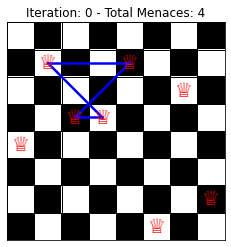

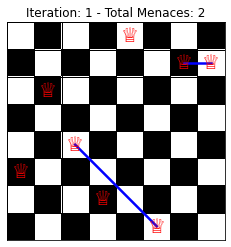

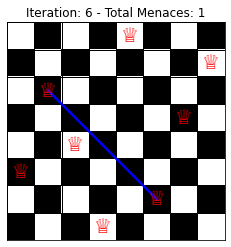

solution found!!


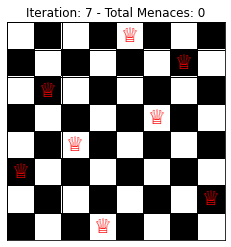

In [76]:
while CHECK_LOOP:
    for i, particle in enumerate(population):
        fitness_value = evaluate_fitness(particle)

        if fitness_value < local_best_scores[i]:
            local_best_scores[i] = fitness_value
            local_best_positions[i] = particle.copy()

        if fitness_value < global_best_score:
            global_best_score = fitness_value
            global_best_position = particle.copy()

        if fitness_value == 0:
            print("solution found!!")
            CHECK_LOOP = False
            break

    global_best_scores_history.append(global_best_score)
    
    for i, particle in enumerate(population):
        for j in range(NUM_QUEENS):
            velocities[i][j] = int(W * velocities[i][j] +
                                   C1 * random.random() * (local_best_positions[i][j] - particle[j]) +
                                   C2 * random.random() * (global_best_position[j] - particle[j]))
            population[i][j] = (population[i][j] + velocities[i][j]) % NUM_QUEENS

    if global_best_score < previous_best_score:
        plot_board(global_best_position, global_best_score, iteration)
        previous_best_score = global_best_score

    iteration += 1

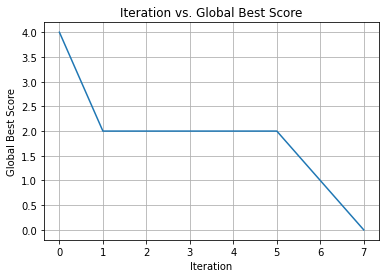

In [77]:
plt.figure()
plt.plot(global_best_scores_history)
plt.xlabel('Iteration')
plt.ylabel('Global Best Score')
plt.title('Iteration vs. Global Best Score')
plt.grid(True)
plt.show()